# Monte Carlo Model
Monte Carlo adalah teknik simulasi dengan memanfaatkan angka random dan dicari titik-titik yang termasuk dalam lingkup uji. Pada kasus ini, kita mencoba mengestimasi nilai PI dari lingkaran dengan radius 1 satuan. Kita tahu bahwa luas sebuah lingkaran adalah
$$A=\pi r^2$$
Penyederhanaan kasus dapat dilakukan dengan mengestimasi nilai PI menggunakan seperempat lingkaran dengan radius 1 satuan.
$$A=\frac{1}{4}\pi r^2$$
$$\pi=\frac{4A}{r^2}$$
Monte Carlo digunakan dalam mengestimasi luas lingkaran ($\hat{A}$) terlebih dahulu. Hasil estimasi luas kemudian digunakan untuk mengestimasi nilai PI.

## Persamaan Lingkaran
Lingkaran yang dibuat adalah lingkaran dengan radius 1 satuan dan pusat di titik $O(0,0)$. Area yang digunakan untuk mengestimasi berbentuk persegi dengan panjang sisi sama dengan radius lingkaran yaitu 1 satuan.
$$x^2+y^2=r^2$$

In [165]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import numpy as np
RADIUS = 1

class Circle:
    def plotter(x:np.ndarray):
        y = np.sqrt(np.ones(len(x)) - np.power(x, 2))
        return y

    def is_inside(x:float, y:float) -> bool:
        if (x**2 + y**2) <= RADIUS:
            return True
        else:
            return False
        

### Tampilan kurva seperempat lingkaran dan luasan berbentuk persegi

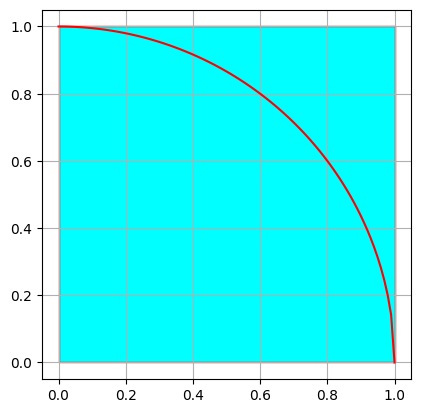

In [166]:
# membuat plot seperempat lingkaran
x_value = np.linspace(0, RADIUS, 100)
y_value = Circle.plotter(x_value)

#membuat area persegi
codes = [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
vertices = np.array([[0,0], [1,0], [1,1], [0,1], [0,0]])

path = Path(vertices, codes)
pathpatch = PathPatch(path, facecolor='cyan', edgecolor='red')

fig, ax = plt.subplots()
ax.plot(x_value, y_value, color='red')
ax.add_patch(pathpatch)

ax.set_aspect('equal')
ax.grid()
plt.show()

### Membuat random float dari 0 sampai 1

In [167]:
from random import random
NUMBER_OF_POINTS = 15000
points = [[],[]]

for i in range(NUMBER_OF_POINTS):
    x = random()
    y = random()
    points[0].append(x)
    points[1].append(y)

points = np.array(points)
points

array([[0.63168045, 0.26335273, 0.25555561, ..., 0.54647637, 0.29269927,
        0.50925837],
       [0.4875312 , 0.02608201, 0.75695387, ..., 0.37273762, 0.7959105 ,
        0.43844148]])

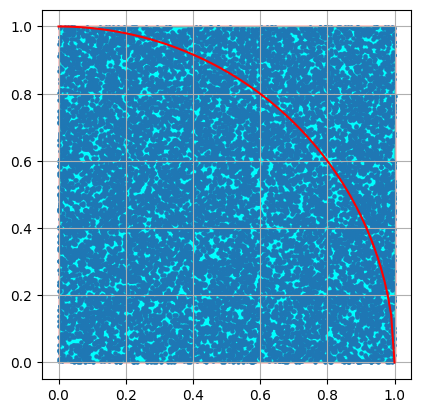

In [168]:
# membuat plot seperempat lingkaran
x_value = np.linspace(0, 1, 100)
y_value = Circle.plotter(x_value)

#membuat area persegi
codes = [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
vertices = np.array([[0,0], [1,0], [1,1], [0,1], [0,0]])

path = Path(vertices, codes)
pathpatch = PathPatch(path, facecolor='cyan', edgecolor='red')

fig, ax = plt.subplots()
ax.plot(x_value, y_value, color='red')
ax.add_patch(pathpatch)
ax.scatter(points[0], points[1], s=5.0)

ax.set_aspect('equal')
ax.grid()
plt.show()

### Membuat validator untuk mengecek apakah titik ada di dalam lingkaran (inklusif) atau di luar lingkaran

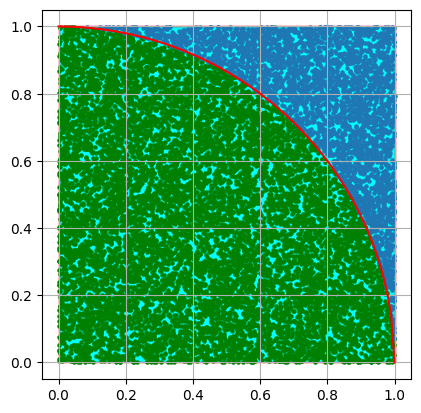

In [169]:


inside_points = [[],[]]
outside_points = [[],[]]
for i in range(NUMBER_OF_POINTS):
    x_value = points[0][i]
    y_value = points[1][i]
    if Circle.is_inside(x_value, y_value):
        inside_points[0].append(x_value)
        inside_points[1].append(y_value)
    else:
        outside_points[0].append(x_value)
        outside_points[1].append(y_value)

# membuat plot seperempat lingkaran
x_value = np.linspace(0, 1, 100)
y_value = Circle.plotter(x_value)

#membuat area persegi
codes = [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
vertices = np.array([[0,0], [1,0], [1,1], [0,1], [0,0]])

path = Path(vertices, codes)
pathpatch = PathPatch(path, facecolor='cyan', edgecolor='red')

fig, ax = plt.subplots()
ax.plot(x_value, y_value, color='red')
ax.add_patch(pathpatch)
ax.scatter(inside_points[0], inside_points[1], s=5.0, c='green')
ax.scatter(outside_points[0], outside_points[1], s=5.0)

ax.set_aspect('equal')
ax.grid()
plt.show()

### Menghitung estimasi luas seperempat lingkaran dengan formula Monte Carlo
$$\hat{A} = \text{luas persegi} \times \frac{\text{banyak titik di dalam area}}{\text{banyak semua titik}}

In [170]:
def luas_persegi(r:float):
    return r**2

est_area = luas_persegi(1) * len(inside_points[0])/len(points[0])
est_area

0.7860666666666667

### Menghitung estimasi nilai PI
$$\pi=\frac{4A}{r^2}$$

In [171]:
est_pi = (4*est_area)/(RADIUS**2)
print(est_pi)

3.1442666666666668


### Menguji Error

In [172]:
error = abs(est_pi-np.pi)*100/np.pi
print(f"Error dari model adalah sebesar {error}%")

Error dari model adalah sebesar 0.08511647981536193%
